# Multiple Linear Regression

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

Here is a data set of sales figures from 26 different stores.

In [10]:
data = pd.read_csv('sales.csv')
data

,net_sales,sq_ft,inventory,advertising,district_size,competing_stores
0,231.0,3.0,294,8.2,8.200000,11
1,156.0,2.2,232,6.9,4.100000,12
2,10.0,0.5,149,3.0,4.300000,15
3,519.0,5.5,600,12.0,16.100000,1
4,437.0,4.4,567,10.6,14.100000,5
5,487.0,4.8,571,11.8,12.700000,4
6,299.0,3.1,512,8.1,10.100000,10
7,195.0,2.5,347,7.7,8.400000,12
8,20.0,1.2,212,3.3,2.100000,15
9,68.0,0.6,102,4.9,4.700000,8


## Two features

Let's try to predict net sales from two variables: the square footage (size) of the store, and the number of competing stores in the area. Our model will be:

$$
\text{net sales} \approx w_0 + w_1 \times \text{sqft} + w_2 \times \text{competitors}
$$

Do you expect $w_1$ to be positive or negative? What about $w_2$?

Let's plot the data.

<IPython.core.display.Javascript object>


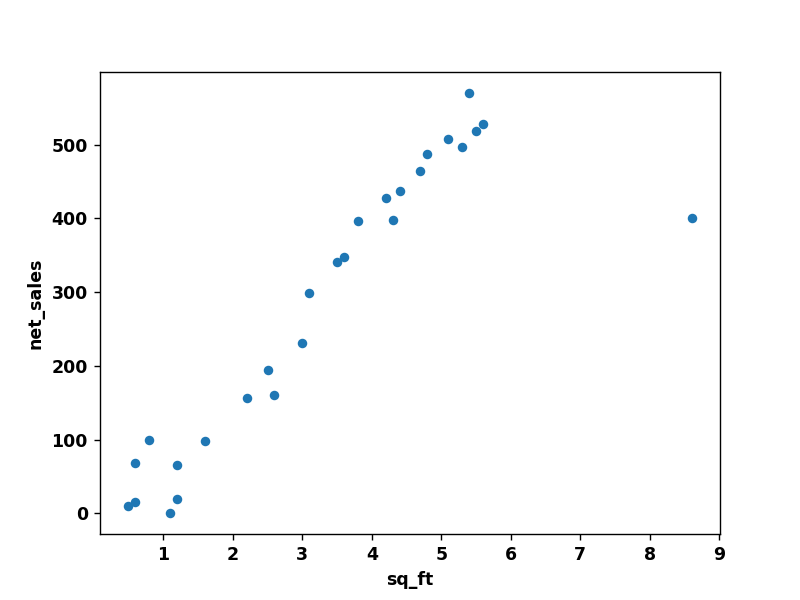

In [11]:
data.plot(kind='scatter', x='sq_ft', y='net_sales')

<IPython.core.display.Javascript object>


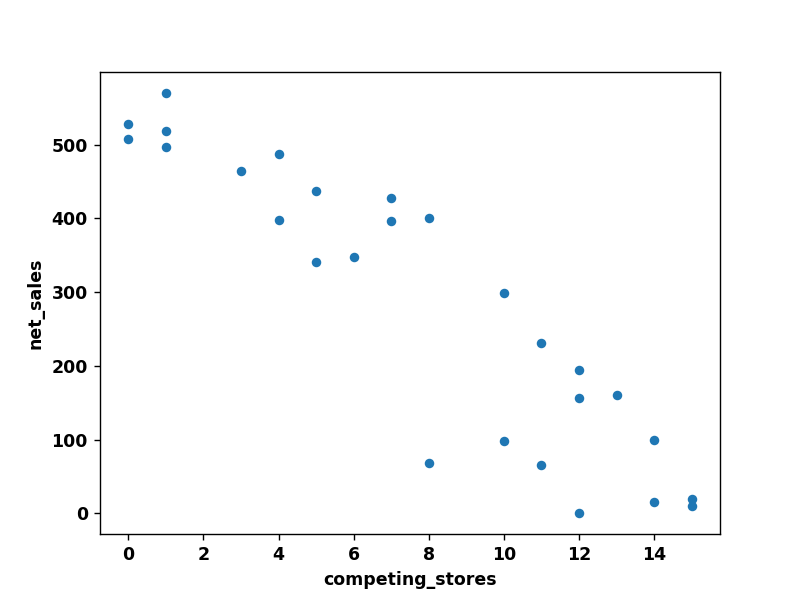

In [12]:
data.plot(kind='scatter', x='competing_stores', y='net_sales')

**Note**: the plot below is interactive. Try clicking and dragging to move the camera.

<IPython.core.display.Javascript object>


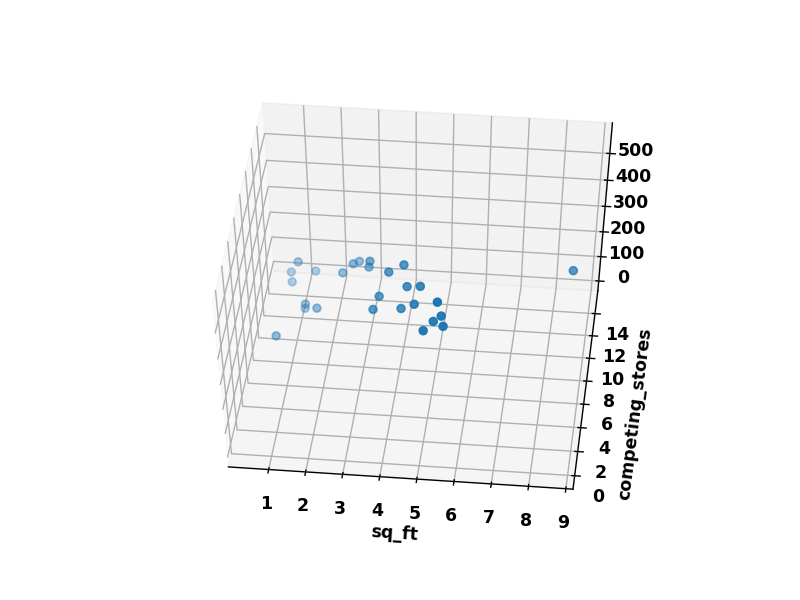

Text(0.5, 0, 'competing_stores')

In [13]:
sq_ft = np.asarray(data['sq_ft'])
competing = np.asarray(data['competing_stores'])
net_sales = np.asarray(data['net_sales'])

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sq_ft, competing, net_sales)
plt.xlabel('sq_ft')
plt.ylabel('competing_stores')

Our design matrix is:
    
$$
\begin{pmatrix}
 1 & s_1 & c_1\\
 1 & s_2 & c_2\\
 \vdots & \vdots & \vdots\\
 1 & s_n & c_n
\end{pmatrix}
$$

where $s_i$ is the size of the $i$th store, and $c_n$ is the number of competitors. In code:

In [14]:
X = np.column_stack((
    np.ones_like(sq_ft),
    sq_ft,
    competing
))
X

array([[ 1.        ,  3.        , 11.        ],
       [ 1.        ,  2.20000005, 12.        ],
       [ 1.        ,  0.5       , 15.        ],
       [ 1.        ,  5.5       ,  1.        ],
       [ 1.        ,  4.4000001 ,  5.        ],
       [ 1.        ,  4.80000019,  4.        ],
       [ 1.        ,  3.0999999 , 10.        ],
       [ 1.        ,  2.5       , 12.        ],
       [ 1.        ,  1.20000005, 15.        ],
       [ 1.        ,  0.60000002,  8.        ],
       [ 1.        ,  5.4000001 ,  1.        ],
       [ 1.        ,  4.19999981,  7.        ],
       [ 1.        ,  4.69999981,  3.        ],
       [ 1.        ,  0.60000002, 14.        ],
       [ 1.        ,  1.20000005, 11.        ],
       [ 1.        ,  1.60000002, 10.        ],
       [ 1.        ,  4.30000019,  4.        ],
       [ 1.        ,  2.5999999 , 13.        ],
       [ 1.        ,  3.79999995,  7.        ],
       [ 1.        ,  5.30000019,  1.        ],
       [ 1.        ,  5.5999999 ,  0.   

Solving the system $X^\intercal X \vec w = X^\intercal \vec y$:

In [15]:
w = np.linalg.solve(X.T @ X, X.T @ net_sales)
w

array([303.49073761,  45.15092186, -21.5851804 ])

The function $H$ that we have fit is not a line; it is a plane:

$$
H(\text{sqft, competitors}) = 303.50 + 45.15 \times \text{sqft} -21.58 \times \text{competitors}
$$


<IPython.core.display.Javascript object>


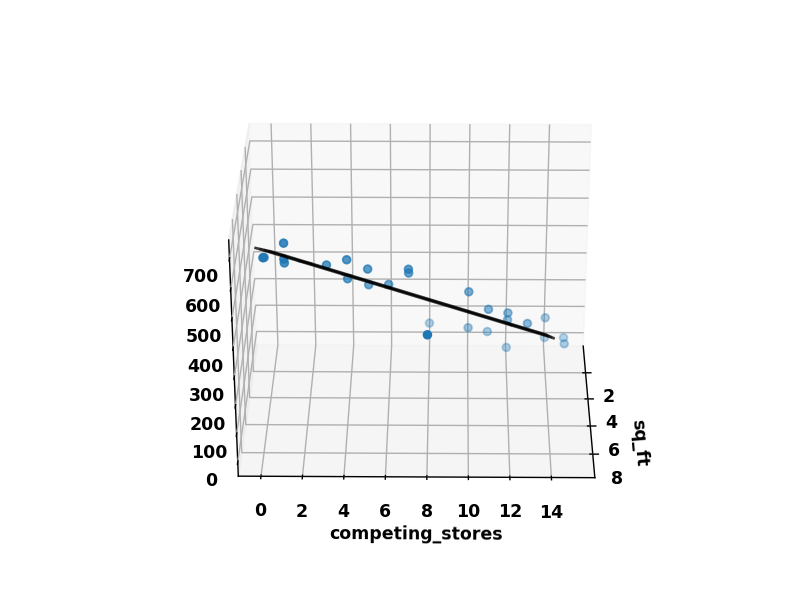

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sq_ft, competing, net_sales)
plt.xlabel('sq_ft')
plt.ylabel('competing_stores')

XX, YY = np.mgrid[1:10:2, 0:16:2]
Z = w[0] + w[1]*XX + w[2]*YY
ax.plot_wireframe(XX, YY, Z, color='black', alpha=.5)

## All features

Let's fit a prediction rule using all of the features.

In [20]:
X = np.column_stack([
    np.ones(data.shape[0]),
    data.iloc[:, 1:].values
])

In [21]:
w = np.linalg.solve(X.T @ X, X.T @ net_sales)
w

array([-18.85941416,  16.20157356,   0.17463515,  11.52626903,
        13.5803129 ,  -5.31097141])

In [22]:
feature_names = list(data.columns[1:])
for name, weight in zip(feature_names, w[1:]):
    print(f'{name}:\t{weight:0.2f}')


sq_ft:	16.20
inventory:	0.17
advertising:	11.53
district_size:	13.58
competing_stores:	-5.31


## Which feature is most "important"?

We should standardize in order to account for the difference in units and scale between the features.

Recall the formula for standard units:

$$x_{(su)} = \dfrac{x - \bar x}{\text{SD}(x)}$$

In [27]:
features = data.iloc[:, 1:].values
standardized_features = (features - features.mean(axis=0))/features.std(axis=0)

In [28]:
X = np.column_stack([
    np.ones(data.shape[0]),
    standardized_features
])

In [29]:
w = np.linalg.solve(X.T @ X, X.T @ net_sales)
w

array([286.57407407,  31.97302867,  32.76054166,  42.69274551,
        68.49841225, -25.51529781])

In [30]:
for name, weight in zip(feature_names, w[1:]):
    print(f'{name}:\t{weight:0.2f}')

sq_ft:	31.97
inventory:	32.76
advertising:	42.69
district_size:	68.50
competing_stores:	-25.52


Which feature appears to have the largest effect on the net sales?